# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [44]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [45]:
cities

['rikitea',
 'amderma',
 'cabo san lucas',
 'ushuaia',
 'punta arenas',
 'urengoy',
 'mar del plata',
 'jacqueville',
 'hirado',
 'qaqortoq',
 'hualmay',
 'sao joao da barra',
 'north platte',
 'albany',
 'itigi',
 'naryan-mar',
 'mayo',
 'chardara',
 'samusu',
 'jamestown',
 'byron bay',
 'hirara',
 'luwingu',
 'atuona',
 'agutaya',
 'flinders',
 'hobart',
 'butaritari',
 'tiksi',
 'makakilo city',
 'hermanus',
 'bentiu',
 'bethel',
 'clyde river',
 'mahebourg',
 'reisterstown',
 'saint george',
 'saint-philippe',
 'hami',
 'attawapiskat',
 'luderitz',
 'pangnirtung',
 'mataura',
 'fredericton',
 'sapernoye',
 'belushya guba',
 'nabire',
 'husavik',
 'narsaq',
 'port elizabeth',
 'sangar',
 'bulawayo',
 'milledgeville',
 'adrar',
 'madimba',
 'avarua',
 'busselton',
 'vaitupu',
 'parry sound',
 'chalus',
 'xaxim',
 'palabuhanratu',
 'rungata',
 'taolanaro',
 'salinopolis',
 'lahat',
 'saint combs',
 'half moon bay',
 'bedford',
 'san patricio',
 'port alfred',
 'codrington',
 'kapaa',

In [46]:
url = "http://api.openweathermap.org/data/2.5/weather?q="
query_url = url + cities[0] + "&appid=" + weather_api_key

response = requests.get(query_url)
weather_json = response.json()
weather_json
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 28},
 'cod': 200,
 'coord': {'lat': -23.1203, 'lon': -134.9692},
 'dt': 1635369271,
 'id': 4030556,
 'main': {'feels_like': 296.86,
          'grnd_level': 1014,
          'humidity': 78,
          'pressure': 1017,
          'sea_level': 1017,
          'temp': 296.44,
          'temp_max': 296.44,
          'temp_min': 296.44},
 'name': 'Rikitea',
 'sys': {'country': 'PF', 'sunrise': 1635344237, 'sunset': 1635390594},
 'timezone': -32400,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 124, 'gust': 2.48, 'speed': 2.88}}


In [47]:
# base url
url = "http://api.openweathermap.org/data/2.5/weather?q="

#lists 
record_count = 0
weather = []

#print log Beginning Data Retrieval     -----------------------------
print("Beginning Data Retrieval")
print("-----------------------------")
#for loop for data with try "processing Record" and except "City not found. Skipping..."#
for city in cities:
    query_url = url + city + "&appid=" + weather_api_key
    #get weather data
    response = requests.get(query_url)
    weather_json = response.json()
    record_count = record_count + 1
    try:
    #insert a time function as needed with set?
        lat = weather_json['coord']['lat']
        lng = weather_json['coord']['lon']
        maxtemp = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        windspeed = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        city_name = weather_json ["name"]
        date = weather_json["dt"]
        weather.append({"City" : city_name,
                                    "Latitude": lat,
                                    "Longitude": lng,
                                    "Max Temp": maxtemp,
                                    "Humidity": humidity,
                                    "Cloudiness": cloudiness,
                                    "Wind Speed" : windspeed,
                                    "Country": country,
                                    "Date": date})
        print(f'Processing Record {record_count} | {city}') 
    except KeyError:
        print(f'{city} not found. Skipping...')
        pass
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record 1 | rikitea
amderma not found. Skipping...
Processing Record 3 | cabo san lucas
Processing Record 4 | ushuaia
Processing Record 5 | punta arenas
Processing Record 6 | urengoy
Processing Record 7 | mar del plata
Processing Record 8 | jacqueville
Processing Record 9 | hirado
Processing Record 10 | qaqortoq
Processing Record 11 | hualmay
Processing Record 12 | sao joao da barra
Processing Record 13 | north platte
Processing Record 14 | albany
Processing Record 15 | itigi
Processing Record 16 | naryan-mar
Processing Record 17 | mayo
Processing Record 18 | chardara
samusu not found. Skipping...
Processing Record 20 | jamestown
Processing Record 21 | byron bay
Processing Record 22 | hirara
Processing Record 23 | luwingu
Processing Record 24 | atuona
Processing Record 25 | agutaya
Processing Record 26 | flinders
Processing Record 27 | hobart
Processing Record 28 | butaritari
Processing Record 29 | tiksi
Processing Record

Processing Record 247 | karasjok
Processing Record 248 | oksfjord
Processing Record 249 | severo-kurilsk
Processing Record 250 | hilo
Processing Record 251 | abay
Processing Record 252 | yeniseysk
Processing Record 253 | mlonggo
Processing Record 254 | batagay-alyta
Processing Record 255 | esperance
Processing Record 256 | missoula
Processing Record 257 | talnakh
Processing Record 258 | yulara
Processing Record 259 | rio grande
Processing Record 260 | saldanha
Processing Record 261 | tinskoy
Processing Record 262 | mettur
Processing Record 263 | bobrovytsya
mentok not found. Skipping...
Processing Record 265 | gemena
Processing Record 266 | lata
Processing Record 267 | lakes entrance
Processing Record 268 | northam
Processing Record 269 | gasa
Processing Record 270 | khatanga
Processing Record 271 | macusani
Processing Record 272 | sorland
Processing Record 273 | sola
Processing Record 274 | petropavlovsk-kamchatskiy
Processing Record 275 | kavieng
Processing Record 276 | zalantun
Proc

Processing Record 495 | kampene
Processing Record 496 | sembe
Processing Record 497 | nuuk
toliary not found. Skipping...
Processing Record 499 | nova prata
Processing Record 500 | faya
Processing Record 501 | aras
Processing Record 502 | nouadhibou
ust-kamchatsk not found. Skipping...
Processing Record 504 | priyutovo
Processing Record 505 | san rafael
Processing Record 506 | ruwi
Processing Record 507 | nanortalik
Processing Record 508 | capaci
Processing Record 509 | bosaso
Processing Record 510 | molnlycke
Processing Record 511 | saint-augustin
sentyabrskiy not found. Skipping...
Processing Record 513 | san fernando
Processing Record 514 | kiama
Processing Record 515 | rapina
hihifo not found. Skipping...
Processing Record 517 | veraval
Processing Record 518 | cadillac
Processing Record 519 | lasa
Processing Record 520 | laguna
Processing Record 521 | valdivia
Processing Record 522 | sebu
Processing Record 523 | benghazi
Processing Record 524 | aksarka
Processing Record 525 | baton

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
#create DF City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
weather_df = pd.DataFrame(weather)
weather_df

#save to csv
weather_df.to_csv("WeatherPy/cityweather.csv")


In [49]:
weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,20.009462,17.960110,288.978192,72.841328,54.346863,3.477546,1.635369e+09
std,33.031490,88.071296,12.141914,19.218000,40.096344,2.647920,9.009821e+01
min,-54.800000,-175.200000,245.100000,11.000000,0.000000,0.000000,1.635368e+09
25%,-5.347800,-60.605925,281.927500,64.000000,9.000000,1.612500,1.635369e+09
50%,22.700000,21.662500,292.410000,77.000000,62.000000,2.690000,1.635369e+09
75%,47.083125,95.583175,298.420000,87.000000,95.000000,4.630000,1.635369e+09
max,78.218600,178.416700,308.140000,100.000000,100.000000,19.950000,1.635369e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [50]:
#skipping step due to nothing being greater than 100% per the max humidity above


In [51]:
#  Get the indices of cities that have humidity over 100%.


In [52]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [53]:
weather_df.head()


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,296.44,78,28,2.88,PF,1635369271
1,Cabo San Lucas,22.8909,-109.9124,304.36,57,20,5.14,MX,1635369277
2,Ushuaia,-54.8000,-68.3000,282.96,57,20,11.32,AR,1635369097
3,Punta Arenas,-53.1500,-70.9167,286.21,44,0,16.98,CL,1635369184
4,Urengoy,65.9667,78.3667,259.76,98,88,2.46,RU,1635369277


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

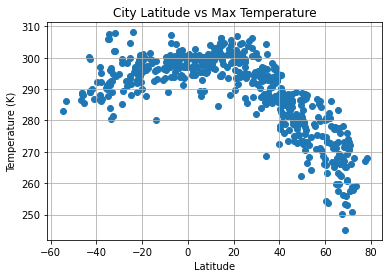

In [55]:
#plot lat vs max tep scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker = "o")

#charting labels and grid
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (K)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("WeatherPy/Lat_MaxTemp.png")

#show plt
plt.show()

## Latitude vs. Humidity Plot

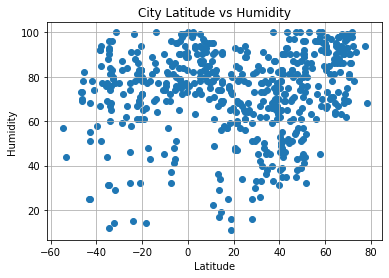

In [57]:
#plot lat vs humidity scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker = "o")

#charting labels and grid
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("WeatherPy/Lat_Humidity.png")

#show plt
plt.show()

## Latitude vs. Cloudiness Plot

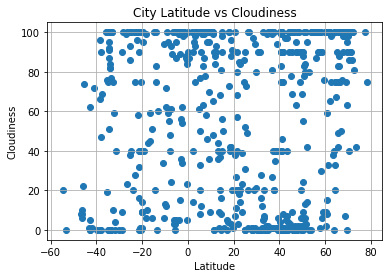

In [59]:
#plot lat vs clouds scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker = "o")

#charting labels and grid
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("WeatherPy/Lat_Cloudiness.png")

#show plt
plt.show()

## Latitude vs. Wind Speed Plot

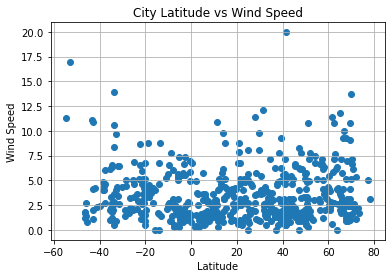

In [61]:
#plot lat vs windspeed scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker = "o")

#charting labels and grid
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("WeatherPy/Lat_Wind.png")

#show plt
plt.show()

## Linear Regression

In [62]:
#loc fuction for northern hemishere 
n_hemi = weather_df.loc[weather_df["Latitude"]>=0]

n_hemi

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Cabo San Lucas,22.8909,-109.9124,304.36,57,20,5.14,MX,1635369277
4,Urengoy,65.9667,78.3667,259.76,98,88,2.46,RU,1635369277
6,Jacqueville,5.2052,-4.4146,300.10,82,33,5.76,CI,1635369278
7,Hirado,33.3597,129.5531,288.35,48,7,3.86,JP,1635369278
8,Qaqortoq,60.7167,-46.0333,273.43,73,8,2.34,GL,1635369279
...,...,...,...,...,...,...,...,...,...
534,Bonfim,3.0833,-59.9500,302.89,63,93,2.54,BR,1635369448
536,Yar-Sale,66.8333,70.8333,262.19,92,50,2.94,RU,1635369448
539,Iralaya,15.0000,-83.2333,304.20,68,98,3.47,HN,1635369449
540,Tiverton,50.9000,-3.4833,288.37,89,83,3.13,GB,1635369450


In [63]:
#loc function for southern hemisphere 
s_hemi = weather_df.loc[weather_df["Latitude"]<0]

s_hemi

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,296.44,78,28,2.88,PF,1635369271
2,Ushuaia,-54.8000,-68.3000,282.96,57,20,11.32,AR,1635369097
3,Punta Arenas,-53.1500,-70.9167,286.21,44,0,16.98,CL,1635369184
5,Mar del Plata,-38.0023,-57.5575,295.16,85,0,4.47,AR,1635369278
9,Hualmay,-11.0964,-77.6139,292.81,74,34,5.28,PE,1635369279
...,...,...,...,...,...,...,...,...,...
530,São Miguel do Iguaçu,-25.3481,-54.2378,304.84,46,100,2.11,BR,1635369447
531,Manicoré,-5.8092,-61.3003,299.87,86,100,0.54,BR,1635369447
535,Isangel,-19.5500,169.2667,299.30,79,100,1.98,VU,1635369448
537,São Gabriel da Cachoeira,-0.1303,-67.0892,299.92,89,100,0.79,BR,1635369449


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

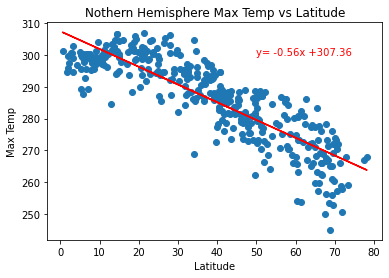

The r-value is: -0.858258730365011


In [65]:
#scatter plot the r value Northern Hemisphere - Max Temp vs. Latitude
x_values = n_hemi["Latitude"]
y_values = n_hemi["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Nothern Hemisphere Max Temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(50,300), color = "red")

#save the figure
plt.savefig("WeatherPy/N_Temp_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

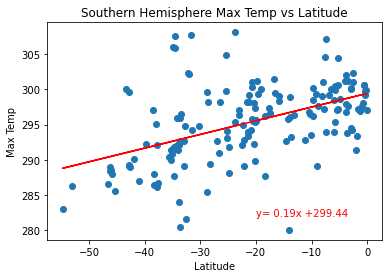

The r-value is: 0.49438232188853576


In [69]:
#scatter plot the r value Southern Hemisphere - Max Temp vs. Latitude
x_values = s_hemi["Latitude"]
y_values = s_hemi["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere Max Temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-20,282), color = "red")

#save the figure
plt.savefig("WeatherPy/S_Temp_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

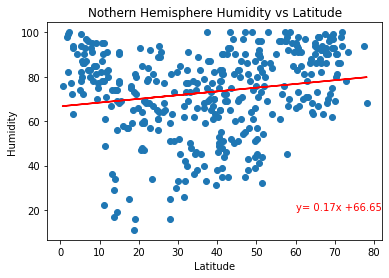

The r-value is: 0.1770901984270652


In [72]:
#scatter plot the r value Northern Hemisphere - Humididty vs. Latitude
x_values = n_hemi["Latitude"]
y_values = n_hemi["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Nothern Hemisphere Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(60,20), color = "red")

#save the figure
plt.savefig("WeatherPy/N_Humidity_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

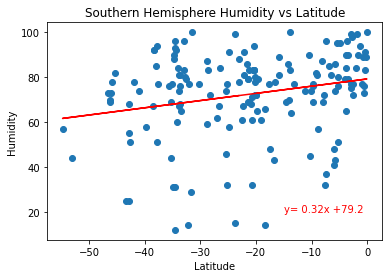

The r-value is: 0.23203163132098922


In [76]:
#scatter plot the r value Southern Hemisphere - Humididty vs. Latitude
x_values = s_hemi["Latitude"]
y_values = s_hemi["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-15,20), color = "red")

#save the figure
plt.savefig("WeatherPy/S_Humidity_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

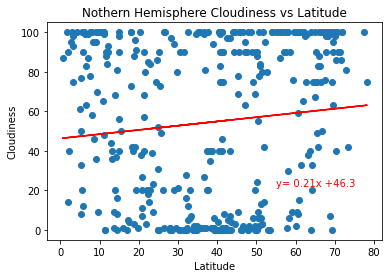

The r-value is: 0.10735663896480749


In [81]:
#scatter plot the r value Northern Hemisphere - clouds vs. Latitude
x_values = n_hemi["Latitude"]
y_values = n_hemi["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Nothern Hemisphere Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(55,22), color = "red")

#save the figure
plt.savefig("WeatherPy/N_Clouds_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

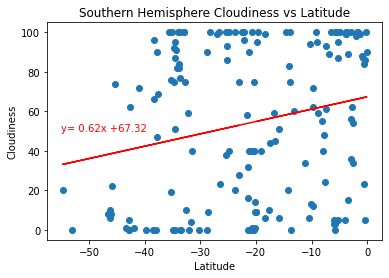

The r-value is: 0.22229246327624674


In [86]:
#scatter plot the r value southern Hemisphere - clouds vs. Latitude
x_values = s_hemi["Latitude"]
y_values = s_hemi["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-55,50), color = "red")

#save the figure
plt.savefig("WeatherPy/S_Clouds_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

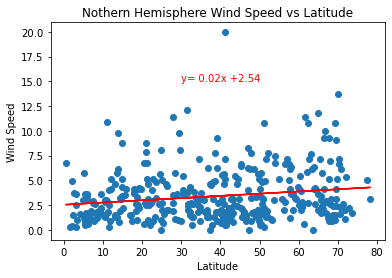

The r-value is: 0.1744693894644454


In [89]:
#scatter plot the r value Northern Hemisphere - wind vs. Latitude
x_values = n_hemi["Latitude"]
y_values = n_hemi["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Nothern Hemisphere Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(30,15), color = "red")

#save the figure
plt.savefig("WeatherPy/N_Winds_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

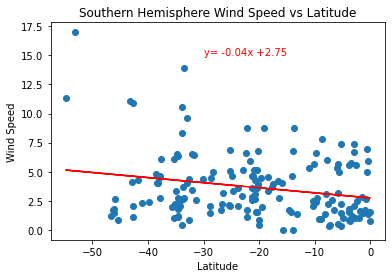

The r-value is: -0.22117160856395895


In [92]:
#scatter plot the r value Southern Hemisphere - wind vs. Latitude
x_values = s_hemi["Latitude"]
y_values = s_hemi["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-30,15), color = "red")

#save the figure
plt.savefig("WeatherPy/S_Winds_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

✓ Analysis correctly describes 3 observable trends
✓ Analysis provides sound reasoning to back up why all 3 trends are occurring. 
